Question: Which housing market has shown the most increase in price, Louisville or Indianapolis?

Create dataset from Zillow highest priced and lowest priced 820 home sales (max limit before Zillow blocks it).
Settings for this process are houses only, sorted by price (high to low then low to high), sold in the last 90 days (performed on 12/4/24 with Google Chrome addon)

In [ ]:
#bring in tools needed
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Import data sets for each grouping: 820 highest priced homes, 820 lowest priced homes in the last 90 days for Louisville and Indianapolis
lou_low = pd.read_csv("C:/Users/Nick Campbell/Desktop/code_you_project/zillow/Louisville_lowest_master.csv")
lou_high = pd.read_csv("C:/Users/Nick Campbell/Desktop/code_you_project/zillow/Louisville_highest_master.csv")
indy_low = pd.read_csv("C:/Users/Nick Campbell/Desktop/code_you_project/zillow/Indianapolis_lowest_master.csv")
indy_high = pd.read_csv("C:/Users/Nick Campbell/Desktop/code_you_project/zillow/Indianapolis_highest_master.csv")

Clean Datasets

In [110]:
#remove unnecessary columns
lou_low = lou_low.drop(columns=["Property type","Property URL","MLS ID","Country","Zip","State","Street address","City"])
lou_high = lou_high.drop(columns=["Property type","Property URL","MLS ID","Country","Zip","State","Street address","City"])
indy_low = indy_low.drop(columns=["Property type","Property URL","MLS ID","Country","Zip","State","Street address","City"])
indy_high = indy_high.drop(columns=["Property type","Property URL","MLS ID","Country","Zip","State","Street address","City"])

In [111]:
#remove any rows that are missing a property price, sold date, or price per living area unit value
lou_low_no_null = lou_low.dropna(subset=["Property price (USD)","Price per living area unit (USD)","Sold date (MM/DD/YYYY)"])
lou_high_no_null = lou_high.dropna(subset=["Property price (USD)","Price per living area unit (USD)","Sold date (MM/DD/YYYY)"])
indy_low_no_null = indy_low.dropna(subset=["Property price (USD)","Price per living area unit (USD)","Sold date (MM/DD/YYYY)"])
indy_high_no_null = indy_high.dropna(subset=["Property price (USD)","Price per living area unit (USD)","Sold date (MM/DD/YYYY)"])


In [ ]:
#sort rows by date sold column
lou_low_sorted = lou_low_no_null.sort_values(by="Sold date (MM/DD/YYYY)")
lou_high_sorted = lou_high_no_null.sort_values(by="Sold date (MM/DD/YYYY)")
indy_high_sorted = indy_high_no_null.sort_values(by="Sold date (MM/DD/YYYY)")
indy_low_sorted = indy_low_no_null.sort_values(by="Sold date (MM/DD/YYYY)")


In [126]:
# Change date formats from MM/DD/YYYY to MM.DD.YYYY
lou_low_sorted["Sold date (MM/DD/YYYY)"] = lou_low_sorted["Sold date (MM/DD/YYYY)"].str.replace("/", ".")
lou_high_sorted["Sold date (MM/DD/YYYY)"] = lou_high_sorted["Sold date (MM/DD/YYYY)"].str.replace("/", ".")
indy_low_sorted["Sold date (MM/DD/YYYY)"] = indy_low_sorted["Sold date (MM/DD/YYYY)"].str.replace("/", ".")
indy_high_sorted["Sold date (MM/DD/YYYY)"] = indy_high_sorted["Sold date (MM/DD/YYYY)"].str.replace("/", ".")

The fun part!

In [127]:
# Show basic comparison (mean and median) between property prices for the lowest value properties sold in Louisville and Indianapolis
print(lou_low_sorted["Property price (USD)"].mean, indy_low_sorted["Property price (USD)"].mean)
print(lou_low_sorted["Property price (USD)"].median, indy_low_sorted["Property price (USD)"].median)

<bound method Series.mean of 533    182000
328    145000
158     87550
25      30000
121     74000
        ...  
277    130000
333    145000
334    145000
244    118000
759    210000
Name: Property price (USD), Length: 803, dtype: int64> <bound method Series.mean of 334    115000
751    171000
730    170000
718    170000
35      45000
        ...  
253    104000
224    100000
481    139900
498    140000
785    175000
Name: Property price (USD), Length: 813, dtype: int64>
<bound method Series.median of 533    182000
328    145000
158     87550
25      30000
121     74000
        ...  
277    130000
333    145000
334    145000
244    118000
759    210000
Name: Property price (USD), Length: 803, dtype: int64> <bound method Series.median of 334    115000
751    171000
730    170000
718    170000
35      45000
        ...  
253    104000
224    100000
481    139900
498    140000
785    175000
Name: Property price (USD), Length: 813, dtype: int64>


In [ ]:
# Show basic comparison (mean and median) between property prices for the highest value properties sold in Louisville and Indianapolis
print(lou_high_sorted["Property price (USD)"].mean, indy_high_sorted["Property price (USD)"].mean)
print(lou_high_sorted["Property price (USD)"].median, indy_high_sorted["Property price (USD)"].median)

The median value of the highest value properties sold in Louisville:  <bound method Series.mean of 392    427310
259    500000
689    344000
455    407500
33     899000
        ...  
184    560000
549    378750
803    318000
404    425000
438    415000
Name: Property price (USD), Length: 810, dtype: int64> 
The median value of the highest value properties sold in Indianapolis:  <bound method Series.mean of 150    585000
373    390500
224    485000
173    551000
436    375000
        ...  
87     700000
189    535000
397    385000
211    500000
187    535000
Name: Property price (USD), Length: 814, dtype: int64>
<bound method Series.median of 392    427310
259    500000
689    344000
455    407500
33     899000
        ...  
184    560000
549    378750
803    318000
404    425000
438    415000
Name: Property price (USD), Length: 810, dtype: int64> <bound method Series.median of 150    585000
373    390500
224    485000
173    551000
436    375000
        ...  
87     700000
189    53500

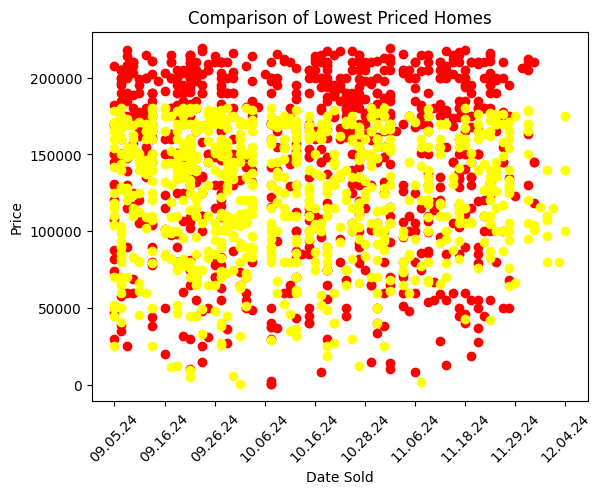

In [ ]:
# Make a scatterplot with lowest priced homes datasets
x1 = lou_low_sorted["Sold date (MM/DD/YYYY)"]
y1 = lou_low_sorted["Property price (USD)"]
x2 = indy_low_sorted["Sold date (MM/DD/YYYY)"]
y2 = indy_low_sorted["Property price (USD)"]

plt.scatter(x1, y1, color="red")
plt.scatter(x2, y2, color="yellow")
plt.xlabel("Date Sold")
plt.ylabel("Price")
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(12)) 
plt.xticks(rotation=45)
plt.title("Comparison of Lowest Priced Homes")
plt.show()

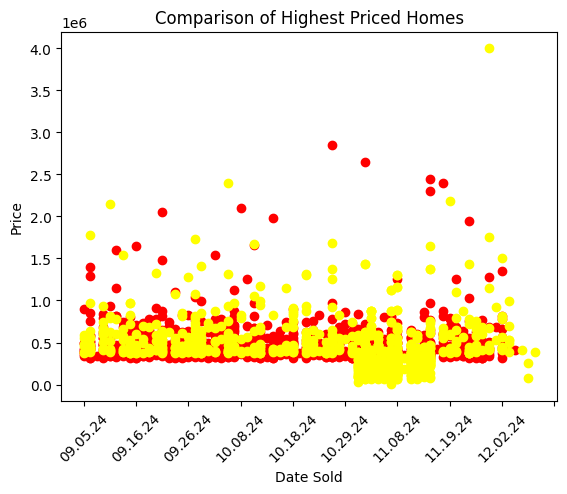

In [ ]:
# Make a scatterplot with highest priced homes datasets
x1 = lou_high_sorted["Sold date (MM/DD/YYYY)"]
y1 = lou_high_sorted["Property price (USD)"]
x2 = indy_high_sorted["Sold date (MM/DD/YYYY)"]
y2 = indy_high_sorted["Property price (USD)"]

plt.scatter(x1, y1, color="red")
plt.scatter(x2, y2, color="yellow")
plt.xlabel("Date Sold")
plt.ylabel("Price")
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(12)) 
plt.xticks(rotation=45)
plt.title("Comparison of Highest Priced Homes")
plt.show()

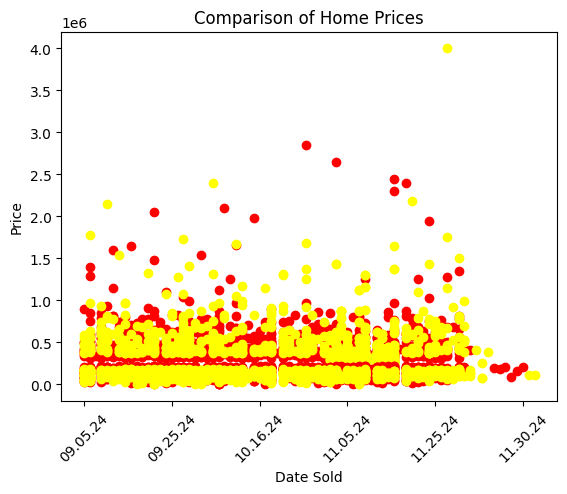

In [ ]:
# home prices from all 4 datasets
x1 = lou_high_sorted["Sold date (MM/DD/YYYY)"]
y1 = lou_high_sorted["Property price (USD)"]
x2 = indy_high_sorted["Sold date (MM/DD/YYYY)"]
y2 = indy_high_sorted["Property price (USD)"]
x3 = lou_low_sorted["Sold date (MM/DD/YYYY)"]
y3 = lou_low_sorted["Property price (USD)"]
x4 = indy_low_sorted["Sold date (MM/DD/YYYY)"]
y4 = indy_low_sorted["Property price (USD)"]

plt.scatter(x1, y1, color="red")
plt.scatter(x2, y2, color="yellow")
plt.scatter(x3, y3, color="red")
plt.scatter(x4, y4, color="yellow")
plt.xlabel("Date Sold")
plt.ylabel("Price")
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(8)) 
plt.xticks(rotation=45)
plt.title("Comparison of Home Prices")
plt.show()

In [ ]:
# sort data by mean and median for each month

lou_low_september_mean = lou_low_sorted["Property price (USD)"].iloc[0:267].mean()
lou_low_october_mean = lou_low_sorted["Property price (USD)"].iloc[267:558].mean()
lou_low_november_mean = lou_low_sorted["Property price (USD)"].iloc[558:794].mean()
lou_low_december_mean = lou_low_sorted["Property price (USD)"].iloc[794:803].mean()

indy_low_september_mean = indy_low_sorted["Property price (USD)"].iloc[0:308].mean()
indy_low_october_mean = indy_low_sorted["Property price (USD)"].iloc[308:626].mean()
indy_low_november_mean = indy_low_sorted["Property price (USD)"].iloc[626:798].mean()
indy_low_december_mean = indy_low_sorted["Property price (USD)"].iloc[798:813].mean()



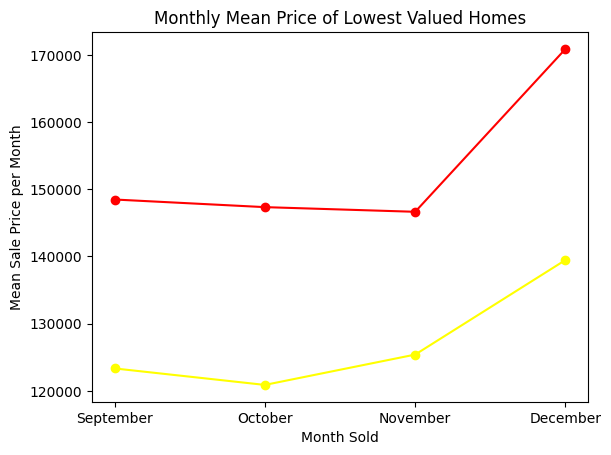

In [ ]:
# chart the monthly mean prices for lowest home values

lou_low_monthly = np.array([lou_low_september_mean, lou_low_october_mean, lou_low_november_mean, lou_low_december_mean])
indy_low_monthly = np.array([indy_low_september_mean, indy_low_october_mean, indy_low_november_mean, indy_low_december_mean])
ax = plt.axes()
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(["September","October","November","December"])
plt.xlabel("Month Sold")
plt.ylabel("Mean Sale Price per Month")
plt.plot(lou_low_monthly, marker="o", color="red")
plt.plot(indy_low_monthly, marker="o", color="yellow")
plt.title("Monthly Mean Price of Lowest Valued Homes")
plt.show()

In [ ]:
# chart the monthly mean prices for the highest priced homes

lou_high_september_mean = lou_high_sorted["Property price (USD)"].iloc[0:260].mean()
lou_high_october_mean = lou_high_sorted["Property price (USD)"].iloc[260:552].mean()
lou_high_november_mean = lou_high_sorted["Property price (USD)"].iloc[552:798].mean()
lou_high_december_mean = lou_high_sorted["Property price (USD)"].iloc[798:810].mean()

indy_high_september_mean = indy_high_sorted["Property price (USD)"].iloc[0:153].mean()
indy_high_october_mean = indy_high_sorted["Property price (USD)"].iloc[153:329].mean()
indy_high_november_mean = indy_high_sorted["Property price (USD)"].iloc[329:799].mean()
indy_high_december_mean = indy_high_sorted["Property price (USD)"].iloc[799:814].mean()

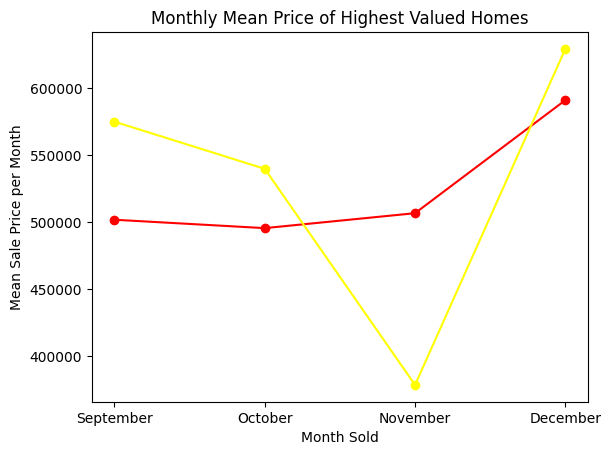

In [351]:
lou_high_monthly = np.array([lou_high_september_mean, lou_high_october_mean, lou_high_november_mean, lou_high_december_mean])
indy_high_monthly = np.array([indy_high_september_mean, indy_high_october_mean, indy_high_november_mean, indy_high_december_mean])
ax = plt.axes()
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(["September","October","November","December"])
plt.xlabel("Month Sold")
plt.ylabel("Mean Sale Price per Month")
plt.plot(lou_high_monthly, marker="o", color="red")
plt.plot(indy_high_monthly, marker="o", color="yellow")
plt.title("Monthly Mean Price of Highest Valued Homes")
plt.show()

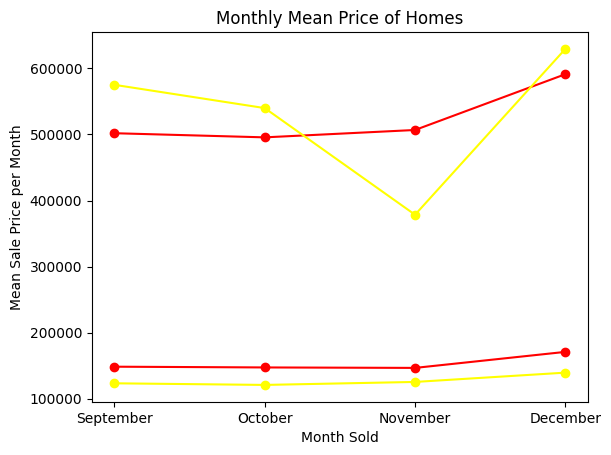

In [ ]:
# chart monthly mean prices for all 4 datasets

ax = plt.axes()
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(["September","October","November","December"])
plt.xlabel("Month Sold")
plt.ylabel("Mean Sale Price per Month")
plt.plot(lou_high_monthly, marker="o", color="red")
plt.plot(indy_high_monthly, marker="o", color="yellow")
plt.plot(lou_low_monthly, marker="o", color="red")
plt.plot(indy_low_monthly, marker="o", color="yellow")
plt.title("Monthly Mean Price of Homes")
plt.show()

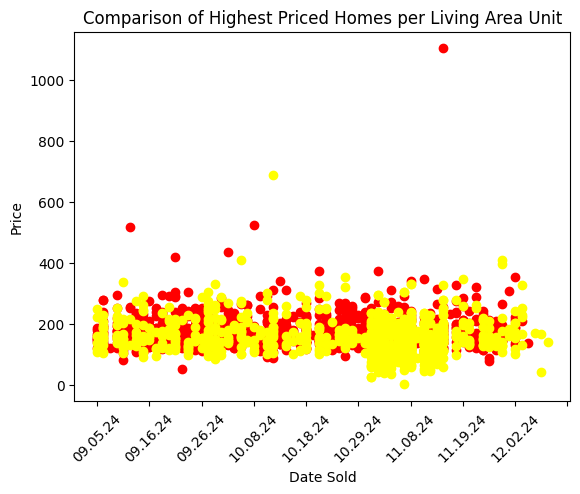

In [ ]:
# look at price per living area unit rather than just raw price

x1 = lou_high_sorted["Sold date (MM/DD/YYYY)"]
y1 = lou_high_sorted["Price per living area unit (USD)"]
x2 = indy_high_sorted["Sold date (MM/DD/YYYY)"]
y2 = indy_high_sorted["Price per living area unit (USD)"]

plt.scatter(x1, y1, color="red")
plt.scatter(x2, y2, color="yellow")
plt.xlabel("Date Sold")
plt.ylabel("Price")
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(12)) 
plt.xticks(rotation=45)
plt.title("Comparison of Highest Priced Homes per Living Area Unit")
plt.show()

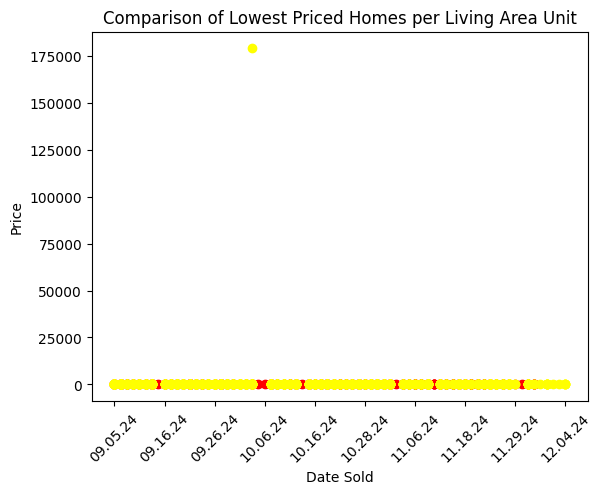

In [432]:
x1 = lou_low_sorted["Sold date (MM/DD/YYYY)"]
y1 = lou_low_sorted["Price per living area unit (USD)"]
x2 = indy_low_sorted["Sold date (MM/DD/YYYY)"]
y2 = indy_low_sorted["Price per living area unit (USD)"]

plt.scatter(x1, y1, color="red")
plt.scatter(x2, y2, color="yellow")
plt.xlabel("Date Sold")
plt.ylabel("Price")
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(12)) 
plt.xticks(rotation=45)
plt.title("Comparison of Lowest Priced Homes per Living Area Unit")
plt.show()

In [407]:
# Remove the outlier (clearly an error in the data)
threshold = 25000
indy_low_dropped = indy_low_sorted[indy_low_sorted["Price per living area unit (USD)"] < 25000]


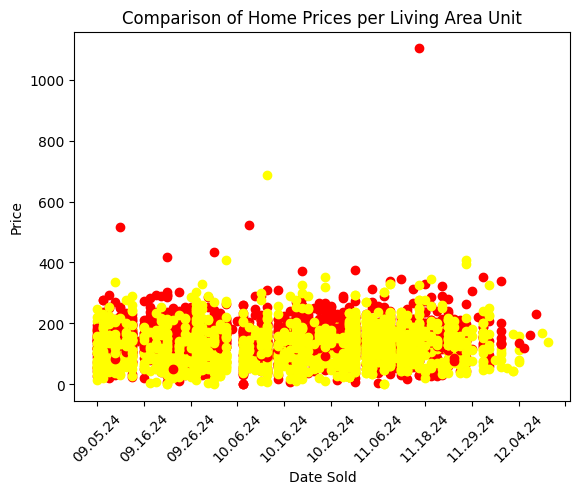

In [ ]:
# scatter plot of all the datasets by price per living area unit

x1 = lou_low_sorted["Sold date (MM/DD/YYYY)"]
y1 = lou_low_sorted["Price per living area unit (USD)"]
x2 = indy_low_dropped["Sold date (MM/DD/YYYY)"]
y2 = indy_low_dropped["Price per living area unit (USD)"]
x3 = lou_high_sorted["Sold date (MM/DD/YYYY)"]
y3 = lou_high_sorted["Price per living area unit (USD)"]
x4 = indy_high_sorted["Sold date (MM/DD/YYYY)"]
y4 = indy_high_sorted["Price per living area unit (USD)"]

plt.scatter(x1, y1, color="red")
plt.scatter(x2, y2, color="yellow")
plt.scatter(x3, y3, color="red")
plt.scatter(x4, y4, color="yellow")
plt.xlabel("Date Sold")
plt.ylabel("Price")
plt.title("Comparison of Home Prices per Living Area Unit")
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(12)) 
plt.xticks(rotation=45)
plt.show()

In [410]:
# organize the per living area unit data by month

lou_low_september_livingarea = lou_low_sorted["Price per living area unit (USD)"].iloc[0:267].mean()
lou_low_october_livingarea = lou_low_sorted["Price per living area unit (USD)"].iloc[267:558].mean()
lou_low_november_livingarea = lou_low_sorted["Price per living area unit (USD)"].iloc[558:794].mean()
lou_low_december_livingarea = lou_low_sorted["Price per living area unit (USD)"].iloc[794:803].mean()

indy_low_september_livingarea = indy_low_dropped["Price per living area unit (USD)"].iloc[0:308].mean()
indy_low_october_livingarea = indy_low_dropped["Price per living area unit (USD)"].iloc[308:626].mean()
indy_low_november_livingarea = indy_low_dropped["Price per living area unit (USD)"].iloc[626:798].mean()
indy_low_december_livingarea = indy_low_dropped["Price per living area unit (USD)"].iloc[798:813].mean()

lou_high_september_livingarea = lou_high_sorted["Price per living area unit (USD)"].iloc[0:260].mean()
lou_high_october_livingarea = lou_high_sorted["Price per living area unit (USD)"].iloc[260:552].mean()
lou_high_november_livingarea = lou_high_sorted["Price per living area unit (USD)"].iloc[552:798].mean()
lou_high_december_livingarea = lou_high_sorted["Price per living area unit (USD)"].iloc[798:810].mean()

indy_high_september_livingarea = indy_high_sorted["Price per living area unit (USD)"].iloc[0:153].mean()
indy_high_october_livingarea = indy_high_sorted["Price per living area unit (USD)"].iloc[153:329].mean()
indy_high_november_livingarea = indy_high_sorted["Price per living area unit (USD)"].iloc[329:799].mean()
indy_high_december_livingarea = indy_high_sorted["Price per living area unit (USD)"].iloc[799:814].mean()

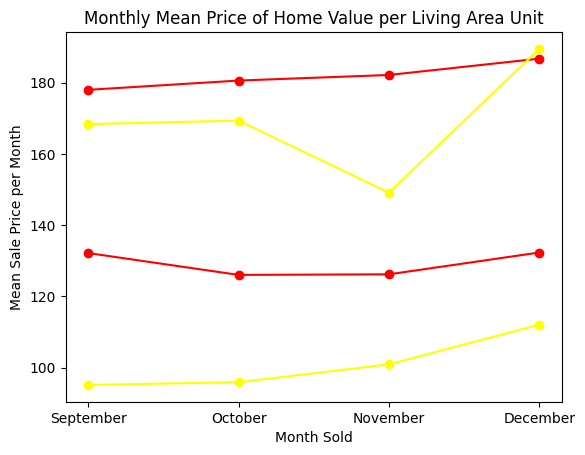

In [411]:
lou_low_monthly_perunit = np.array([lou_low_september_livingarea, lou_low_october_livingarea, lou_low_november_livingarea, lou_low_december_livingarea])
indy_low_monthly_perunit = np.array([indy_low_september_livingarea, indy_low_october_livingarea, indy_low_november_livingarea, indy_low_december_livingarea])
lou_high_monthly_perunit = np.array([lou_high_september_livingarea, lou_high_october_livingarea, lou_high_november_livingarea, lou_high_december_livingarea])
indy_high_monthly_perunit = np.array([indy_high_september_livingarea, indy_high_october_livingarea, indy_high_november_livingarea, indy_high_december_livingarea])
ax = plt.axes()
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(["September","October","November","December"])
plt.xlabel("Month Sold")
plt.ylabel("Mean Sale Price per Month")
plt.plot(lou_low_monthly_perunit, marker="o", color="red")
plt.plot(indy_low_monthly_perunit, marker="o", color="yellow")
plt.plot(lou_high_monthly_perunit, marker="o", color="red")
plt.plot(indy_high_monthly_perunit, marker="o", color="yellow")

plt.title("Monthly Mean Price of Home Value per Living Area Unit")
plt.show()

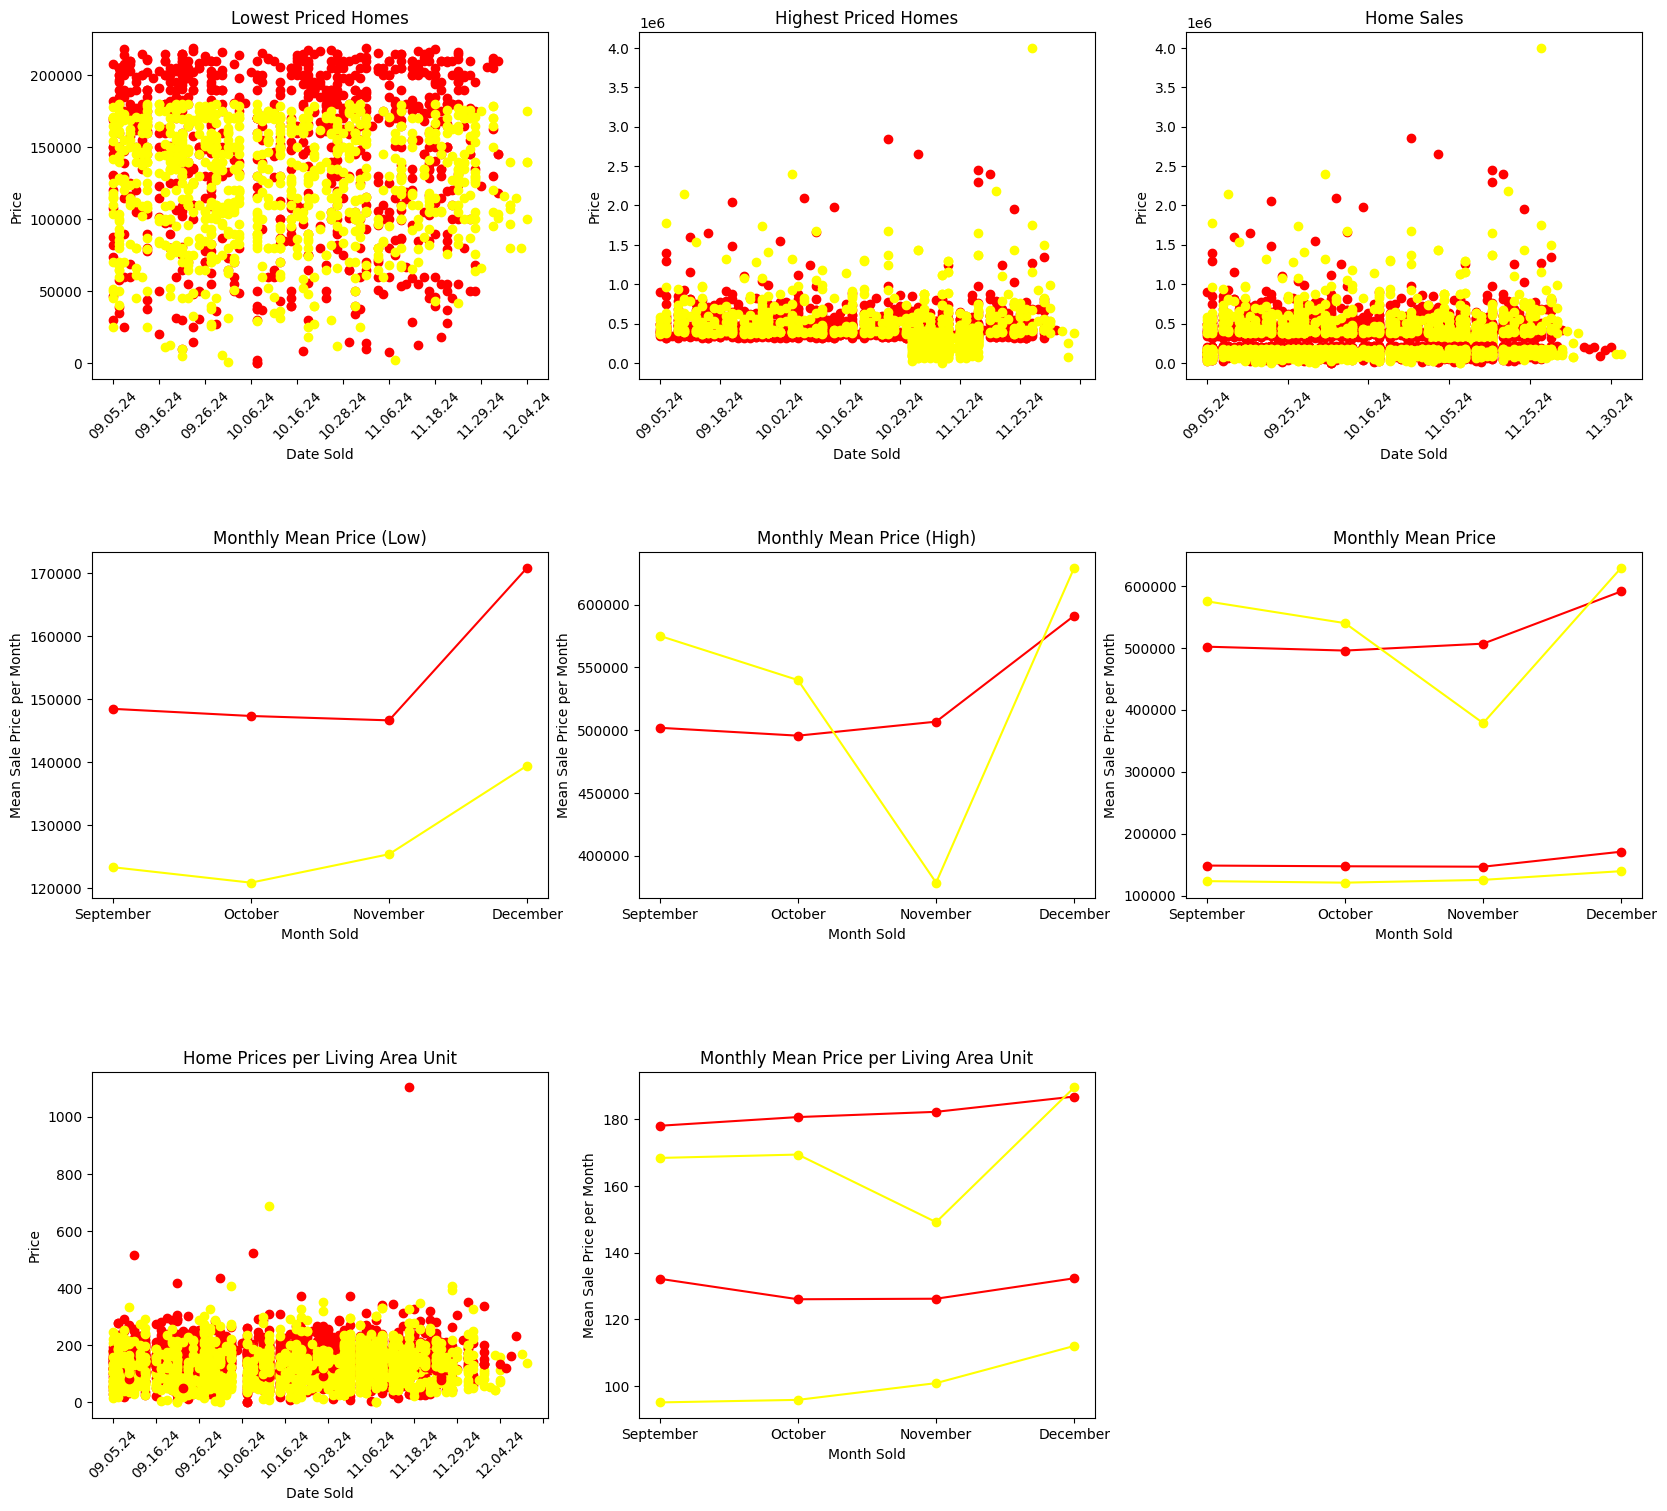

In [543]:
# Make a dashboard
fig = plt.figure(figsize=([20,18]))
grid = fig.add_gridspec(ncols=3,nrows=3)

# scatterplot 1
ax1 = fig.add_subplot(grid[0, 0])
x1 = lou_low_sorted["Sold date (MM/DD/YYYY)"]
y1 = lou_low_sorted["Property price (USD)"]
x2 = indy_low_sorted["Sold date (MM/DD/YYYY)"]
y2 = indy_low_sorted["Property price (USD)"]

ax1.scatter(x1, y1, color="red")
ax1.scatter(x2, y2, color="yellow")
plt.xlabel("Date Sold", axes=ax1)
plt.ylabel("Price", axes=ax1)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10)) 
plt.xticks(rotation=45, axes=ax1)
plt.title("Lowest Priced Homes", axes=ax1)

#scatterplot 2
ax2 = fig.add_subplot(grid[0,1])
x1 = lou_high_sorted["Sold date (MM/DD/YYYY)"]
y1 = lou_high_sorted["Property price (USD)"]
x2 = indy_high_sorted["Sold date (MM/DD/YYYY)"]
y2 = indy_high_sorted["Property price (USD)"]

ax2.scatter(x1, y1, color="red")
ax2.scatter(x2, y2, color="yellow")
plt.xlabel("Date Sold", axes=ax2)
plt.ylabel("Price", axes=ax2)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(8)) 
plt.xticks(rotation=45, axes=ax2)
plt.title("Highest Priced Homes", axes=ax2)

#scatterplot 3
ax3 = fig.add_subplot(grid[0,2])
x1 = lou_high_sorted["Sold date (MM/DD/YYYY)"]
y1 = lou_high_sorted["Property price (USD)"]
x2 = indy_high_sorted["Sold date (MM/DD/YYYY)"]
y2 = indy_high_sorted["Property price (USD)"]
x3 = lou_low_sorted["Sold date (MM/DD/YYYY)"]
y3 = lou_low_sorted["Property price (USD)"]
x4 = indy_low_sorted["Sold date (MM/DD/YYYY)"]
y4 = indy_low_sorted["Property price (USD)"]

ax3.scatter(x1, y1, color="red")
ax3.scatter(x2, y2, color="yellow")
ax3.scatter(x3, y3, color="red")
ax3.scatter(x4, y4, color="yellow")
plt.xlabel("Date Sold", axes=ax3)
plt.ylabel("Price", axes=ax3)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(8)) 
plt.xticks(rotation=45, axes=ax3)
plt.title("Home Sales", axes=ax3)
 
#Line graph 1
ax4 = fig.add_subplot(grid[1,0])
lou_low_monthly = np.array([lou_low_september_mean, lou_low_october_mean, lou_low_november_mean, lou_low_december_mean])
indy_low_monthly = np.array([indy_low_september_mean, indy_low_october_mean, indy_low_november_mean, indy_low_december_mean])

ax4.set_xticks([0,1,2,3])
ax4.set_xticklabels(["September","October","November","December"])
plt.xlabel("Month Sold", axes=ax4)
plt.ylabel("Mean Sale Price per Month", axes=ax4)
ax4.plot(lou_low_monthly, marker="o", color="red")
ax4.plot(indy_low_monthly, marker="o", color="yellow")
plt.title("Monthly Mean Price (Low)", axes=ax4)

#line graph 2
ax5 = fig.add_subplot(grid[1,1])
lou_high_monthly = np.array([lou_high_september_mean, lou_high_october_mean, lou_high_november_mean, lou_high_december_mean])
indy_high_monthly = np.array([indy_high_september_mean, indy_high_october_mean, indy_high_november_mean, indy_high_december_mean])

ax5.set_xticks([0,1,2,3])
ax5.set_xticklabels(["September","October","November","December"])
plt.xlabel("Month Sold", axes=ax5)
plt.ylabel("Mean Sale Price per Month", axes=ax5)
ax5.plot(lou_high_monthly, marker="o", color="red")
ax5.plot(indy_high_monthly, marker="o", color="yellow")
plt.title("Monthly Mean Price (High)", axes=ax5)

 
#line graph combined
ax6 = fig.add_subplot(grid[1,2])
ax6.set_xticks([0,1,2,3])
ax6.set_xticklabels(["September","October","November","December"])
plt.xlabel("Month Sold", axes=ax6)
plt.ylabel("Mean Sale Price per Month", axes=ax6)
ax6.plot(lou_high_monthly, marker="o", color="red")
ax6.plot(indy_high_monthly, marker="o", color="yellow")
ax6.plot(lou_low_monthly, marker="o", color="red")
ax6.plot(indy_low_monthly, marker="o", color="yellow")
plt.title("Monthly Mean Price", axes=ax6)


#scatter price per living area
ax7 = fig.add_subplot(grid[2,0])
x1 = lou_low_sorted["Sold date (MM/DD/YYYY)"]
y1 = lou_low_sorted["Price per living area unit (USD)"]
x2 = indy_low_dropped["Sold date (MM/DD/YYYY)"]
y2 = indy_low_dropped["Price per living area unit (USD)"]
x3 = lou_high_sorted["Sold date (MM/DD/YYYY)"]
y3 = lou_high_sorted["Price per living area unit (USD)"]
x4 = indy_high_sorted["Sold date (MM/DD/YYYY)"]
y4 = indy_high_sorted["Price per living area unit (USD)"]

ax7.scatter(x1, y1, color="red")
ax7.scatter(x2, y2, color="yellow")
ax7.scatter(x3, y3, color="red")
ax7.scatter(x4, y4, color="yellow")
plt.xlabel("Date Sold", axes=ax7)
plt.ylabel("Price", axes=ax7)
plt.title("Home Prices per Living Area Unit", axes=ax7)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(12)) 
plt.xticks(rotation=45, axes=ax7)
 
#living area line graph
ax8 = fig.add_subplot(grid[2,1])
lou_low_monthly_perunit = np.array([lou_low_september_livingarea, lou_low_october_livingarea, lou_low_november_livingarea, lou_low_december_livingarea])
indy_low_monthly_perunit = np.array([indy_low_september_livingarea, indy_low_october_livingarea, indy_low_november_livingarea, indy_low_december_livingarea])
lou_high_monthly_perunit = np.array([lou_high_september_livingarea, lou_high_october_livingarea, lou_high_november_livingarea, lou_high_december_livingarea])
indy_high_monthly_perunit = np.array([indy_high_september_livingarea, indy_high_october_livingarea, indy_high_november_livingarea, indy_high_december_livingarea])

ax8.set_xticks([0,1,2,3])
ax8.set_xticklabels(["September","October","November","December"])
plt.xlabel("Month Sold", axes=ax8)
plt.ylabel("Mean Sale Price per Month", axes=ax8)
ax8.plot(lou_low_monthly_perunit, marker="o", color="red")
ax8.plot(indy_low_monthly_perunit, marker="o", color="yellow")
ax8.plot(lou_high_monthly_perunit, marker="o", color="red")
ax8.plot(indy_high_monthly_perunit, marker="o", color="yellow")
plt.title("Monthly Mean Price per Living Area Unit", axes=ax8)

 

plt.subplots_adjust(hspace=0.5) 
plt.show()

Analysis:
My initial question was: Which housing market has shown the most increase in price, Louisville or Indianapolis?
After looking at home sale prices and the prices per living area unit (sqft), I recognize that my question cannot be answered directly. Generally, Louisville homes have a wider range of prices, but this is not an increase in price. As seen on the first scatter plots of home sales, Louisville has more homes that have sold at higher prices and lower prices than Indianapolis. However, converting these raw sales into mean sale price for each month (the line graphs), shows no major increase (or decrease) in the Louisville values. So, the wider range of Louisville prices does not indicate that the property prices are increasing (at least not significantly).
Instead of one market being hotter than the other, it apears that one is more volatile than the other. Looking at the line charts of the monthly mean sale prices, the lowest priced homes increase in value for Indianapolis (I included December but we are only a few days in so the increase there is not very significant), but then the highest priced homes have a significant drop in sale prices in November. Louisville has small changes (decrease in the lower home prices and increase in the higher home prices), but nothing as significant as the jumps being made in Indianopolis.
A more significant marker, in my opinion, is the price per interior unit. Since Zillow will only display a selection of all the sales for the previous months (there are a few thousand), I could only see the 820 lowest and highest priced homes. Though the home prices hover between 120k-150k and 400k-600k respectively (again not counting the 4 days of December when I ran this), the change in price per interior unit confirms that there is change, especially with Indianapolis. For example, the lower value Indianapolis homes decrease in price from September to October and then increase. The price per interior unit increases each month but significantly in November. So, not only are these homes being sold for more money from October to November, people are buying less house for more money (i.e., it isn't just that bigger houses suddenly came on the market). The higher priced homes in Indianapolis are also interesting because the prices go down while the price per interior unit goes up in October but then both drop significantly in November. 
Meanwhile, in Louisville, lower priced homes decrease steadily in price and price per interior unit from September to November and steadily increased for both in the higher priced homes.

Main Conclusions:
Depending on whether we look at the higher priced or lower priced homes, Indianapolis or Louisville could be argued as the hotter market (Louisville increases from September to November in the higher priced homes while Indianapolis increases in the lower priced houses). This makes the answer to the initial question inconclusive. However, it is much easier to answer which one is the most volatile: Indianapolis. Both sets of data (lower and higher priced homes) show a steady change month to month in Louisville, but Indianapolis has much larger changes month to month.

Further Research:
In an ideal world, future research could be done on all the home sales per month for each city. However, most online listing sites limit the number of entries that they will display (even on their sale maps). Another method could be looking further back than 90 days but, here again, the increase in sold properties hits the maximum display limit. I would also like to see the difference between the listing prices and the sold prices, but that would take time to document since the listing prices aren’t always available after the property is sold. There are so many ways that this data could be reanalyzed, whether the data as I have it now or with a few additions (like list prices).